# 3. Open Problem

## Confronto tra artisti mainstream ed emergenti in base alla loro struttura di rete con previsione di down/upgrade

Ci si interroga su quale potrebbe essere la **differenza strutturale tra la rete degli artisti mainstream e quella degli artisti emergenti**, in termini di centralità, densità e distribuzione delle connessioni.

Inoltre si prova a **prevedere** se, in base ai Ratio e alla popolarità, un artista può avere la **possibilità di diventare più conosciuto** o, se le condizioni sono sfavorevoli, tornare poco conosciuto.

## 3.1. Generalità e definizione dei parametri

Per calcolare la **popolarità** di un artista ci si è basati sul **Sample Ratio**, lo **Jaccard Ratio**, il numero di **ascolti** e quello di **ascoltatori**. Questo è stato svolto grazie al metodo `updatePopularity()` nell'oggetto `Artists`.

Si considerano tre tipi di popolarità:

- La **popolarità "*grezza*"** calcolata come
$$
    pop = \frac{ascolti}{ascoltatori+1}
$$
- La **popolarità logaritmica**:
$$
    pop_{log} = log(pop+1)
$$
- Lo **Z-Index**. Dati la media $m$ e la deviazione standard $\sigma$:
$$
m = \frac{1}{N} \sum_{i=1}^{N} pop_{log, i} \quad \quad \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( pop_{log, i} - m \right)^2 }
$$

$$
Z_i = \frac{pop_{log, i} - m}{\sigma}
$$

Lo Z-Index è utile per capire quanto la popolarità logaritmica sia sopra la media (se il valore è $> 0$) o sotto (se $< 0$). Dunque più è alto, più l'artista è mainstream; altrimenti è considerabile di nicchia.

In primo luogo si carica il dataset per lo studio. Rispetto alla seconda parte si caricano anche i **CSV delle popolarità** e degli **Z-Index**:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx.algorithms.community as nxC
import seaborn as sns
import csv

plt.rcParams['font.sans-serif'] = ['Meiryo']
plt.rcParams['axes.unicode_minus'] = False

LINKS_PATH = "../data_collection/data/links.csv"
ARTISTS_PATH = "../data_collection/data/artists.csv"
POPULARITY_PATH = "../data_collection/data/popularity.csv"
ZPOPULARITY_PATH = "../data_collection/data/popularity_z.csv"

adf = pd.read_csv(ARTISTS_PATH, encoding="utf-8")
ldf = pd.read_csv(LINKS_PATH, encoding="utf-8")
pdf = pd.read_csv(POPULARITY_PATH, encoding="utf-8")
zdf = pd.read_csv(ZPOPULARITY_PATH, encoding="utf-8")

ars = pd.concat([ldf["IDArtista1"], ldf["IDArtista2"]]).unique()

g = nx.Graph()
g.add_nodes_from(ars)

nodes = g.number_of_nodes()

with open(LINKS_PATH, "r", encoding="utf-8") as f:
    
    reader = csv.reader(f)
    next(reader)
    
    for parts in reader:
        if len(parts) < 6:
            continue
        
        id1, ar1, id2, ar2, sRatio, jRatio = parts[:6]
        
        try:
            id1 = int(id1)
            id2 = int(id2)
            sRatio = float(sRatio)
            jRatio = float(jRatio)
        except ValueError:
            continue
        
        g.add_edge(id1, id2, sRatio=sRatio, jRatio=jRatio)
        
        g.nodes[id1]["name"] = ar1
        g.nodes[id2]["name"] = ar2


edges = g.number_of_edges()

directed = "" if g.is_directed() else " non"
density = np.format_float_scientific(nx.density(g), precision=5, exp_digits=2)

print(f"{nodes} artisti connessi su {len(adf)} ({round((nodes / len(adf)) * 100, 2)}%).\n{edges} archi nel dataset.\nIl grafo{directed} è orientato.\n\nLa densità è di {density}.")

11745 artisti connessi su 28870 (40.68%).
98890 archi nel dataset.
Il grafo non è orientato.

La densità è di 1.43388e-03.


Visualizziamo la tabella con le popolarità di tutti e 28870 artisti con Z-Index decrescente:

In [2]:
zdf = zdf.sort_values(by='ZIndex', ascending=False)
zdf

,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex
6024,6025,Toffa MC,7,11095,1386.87500,7.23552,6.62273
17582,17583,V,731203,549964434,752.13542,6.62424,5.72902
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102
22803,22804,RM,618814,355136873,573.89829,6.35419,5.33420
199,200,Taylor Swift,5081389,2911871348,573.04622,6.35270,5.33202
...,...,...,...,...,...,...,...
7774,7775,Gabrielkoral,3,3,0.75000,0.55961,-3.13765
8410,8411,"Silvana Martino, Massimo Masiello",0,0,0.00000,0.00000,-3.95581
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000,-3.95581
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000,-3.95581


Filtrando con gli artisti connessi in ```links.csv``` e ordinando rispettivamente per ```PopolaritàLog``` e ```ZIndex``` abbiamo le seguenti tabelle.


In [3]:
conIDs = set(g.nodes)

conPdfIDs = pdf[pdf["ID"].isin(conIDs)].sort_values(by='PopolaritàLog', ascending=False)
conZdfIDs = zdf[zdf["ID"].isin(conIDs)].sort_values(by='ZIndex', ascending=False)

conPdfIDs

,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog
12632,12633,Lyodra,27484,20559599,748.02979,6.61877
24662,24663,乃木坂46,19038,6776806,355.94337,5.87757
27618,27619,TOMORROW X TOGETHER,987319,334539893,338.83633,5.82846
24690,24691,つばきファクトリー,1103,340332,308.27173,5.73422
4443,4444,Loredana Errore,5855,1722425,294.12995,5.68741
...,...,...,...,...,...,...
7774,7775,Gabrielkoral,3,3,0.75000,0.55961
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000
8408,8409,"Amedeo Pariante, Pina Lamara",0,0,0.00000,0.00000
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000


In [4]:
conZdfIDs

,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102
24662,24663,乃木坂46,19038,6776806,355.94337,5.87757,4.63737
27618,27619,TOMORROW X TOGETHER,987319,334539893,338.83633,5.82846,4.56557
24690,24691,つばきファクトリー,1103,340332,308.27173,5.73422,4.42779
4443,4444,Loredana Errore,5855,1722425,294.12995,5.68741,4.35935
...,...,...,...,...,...,...,...
7774,7775,Gabrielkoral,3,3,0.75000,0.55961,-3.13765
8410,8411,"Silvana Martino, Massimo Masiello",0,0,0.00000,0.00000,-3.95581
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000,-3.95581
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000,-3.95581


## 3.2. Definizione delle classi

Proviamo a distinguere i mainstream dai non per mezzo dei **percentili dello Z-Index**. In base al numero di artisti possiamo considerare come mainstream e come emergente rispettivamente il primo **15%** e l'ultimo **15%** di essi.

Dunque subito dopo mostriamo la classe di riferimento tramite la colonna `Classe`:

In [5]:
mstreamThold = conZdfIDs["ZIndex"].quantile(0.85)   # Il primo 15% = mainstream
emrgentThold = conZdfIDs["ZIndex"].quantile(0.15)   # L'ultimo 15% = emergente

def classifyArtist(z):
    if z >= mstreamThold:
        return "Mainstream"         # 15%
    elif z <= emrgentThold:
        return "Emergente"          # 15%
    else:
        return "Medio"              # 70%

conZdfIDs["Classe"] = zdf["ZIndex"].apply(classifyArtist)
conZdfIDs

,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex,Classe
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102,Mainstream
24662,24663,乃木坂46,19038,6776806,355.94337,5.87757,4.63737,Mainstream
27618,27619,TOMORROW X TOGETHER,987319,334539893,338.83633,5.82846,4.56557,Mainstream
24690,24691,つばきファクトリー,1103,340332,308.27173,5.73422,4.42779,Mainstream
4443,4444,Loredana Errore,5855,1722425,294.12995,5.68741,4.35935,Mainstream
...,...,...,...,...,...,...,...,...
7774,7775,Gabrielkoral,3,3,0.75000,0.55961,-3.13765,Emergente
8410,8411,"Silvana Martino, Massimo Masiello",0,0,0.00000,0.00000,-3.95581,Emergente
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000,-3.95581,Emergente
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000,-3.95581,Emergente


A questo punto ci si concentra sugli archi. Creiamo una tabella che mostra gli **accoppiamenti tra le classi di artisti**. Le colonne `Classe1` e `Classe2` mostrano le classi degli artisti collegati in quell'arco:

In [6]:
linkDf = ldf.copy()
linkDf = linkDf.astype({"IDArtista1": int, "IDArtista2": int})
merged1 = linkDf.merge(conZdfIDs[["ID", "Classe"]], left_on="IDArtista1", right_on="ID", how="left")
merged2 = merged1.merge(conZdfIDs[["ID", "Classe"]], left_on="IDArtista2", right_on="ID", suffixes=("1", "2"), how="left")

merged2.drop(columns=["ID1", "ID2"], inplace=True)
merged2

,IDArtista1,Artista1,IDArtista2,Artista2,SampleRatio,JaccardRatio,Classe1,Classe2
0,1,Annalisa,5,Elodie,80.0,67.0,Mainstream,Mainstream
1,1,Annalisa,6,Emma,75.0,60.0,Mainstream,Medio
2,1,Annalisa,9,Clara,67.0,50.0,Mainstream,Medio
3,1,Annalisa,10,Francesca Michielin,73.0,58.0,Mainstream,Medio
4,1,Annalisa,12,The Kolors,69.0,53.0,Mainstream,Medio
...,...,...,...,...,...,...,...,...
98895,19779,Man Overboard,19897,Bearings,77.0,63.0,Mainstream,Medio
98896,19779,Man Overboard,19898,The Wonder Years,78.0,63.0,Mainstream,Mainstream
98897,19779,Man Overboard,19903,Four Year Strong,74.0,59.0,Mainstream,Mainstream
98898,19779,Man Overboard,19909,The Story So Far,80.0,66.0,Mainstream,Mainstream


Mostriamo quindi una **heatmap** che evidenzia, a livello quantitativo, il numero di archi che collega i rispettivi artisti per ciascuna combinazione di classi:

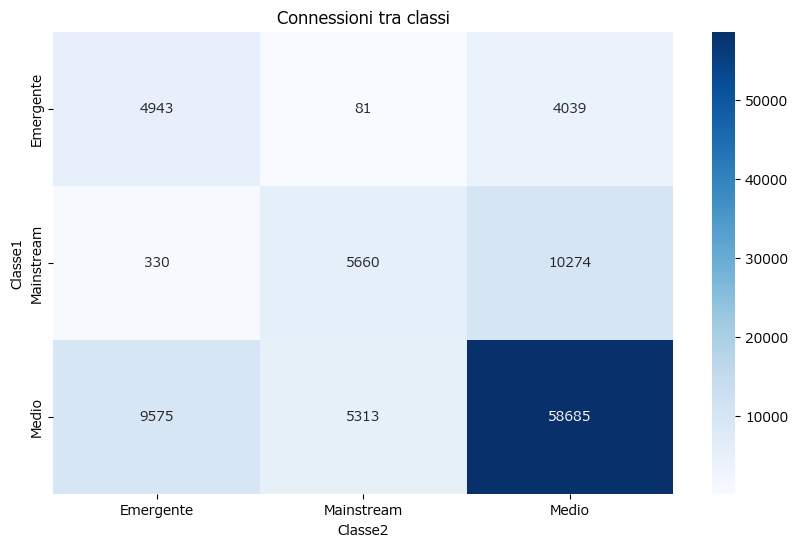

In [7]:
connMatrix = merged2.groupby(["Classe1", "Classe2"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(connMatrix, annot=True, fmt="d", cmap="Blues")
plt.title("Connessioni tra classi")
plt.show()

Analizzando più a fondo, si mostra qui di seguito la distribuzione, tramite **box plot**, degli archi tenendo conto dei Sample e dei Jaccard ratio.

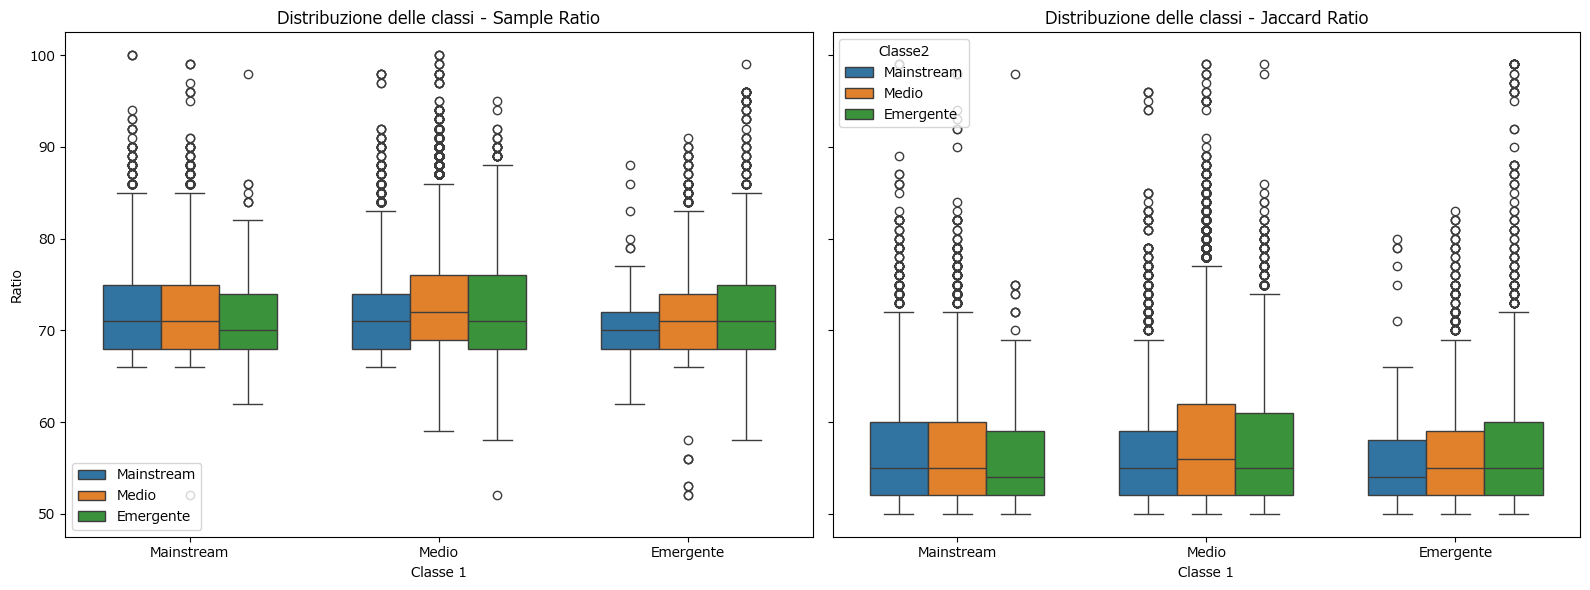

In [8]:
mRatios = merged2.groupby(["Classe1", "Classe2"])[["SampleRatio", "JaccardRatio"]].mean().round(1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.boxplot(data=merged2, x="Classe1", y="SampleRatio", hue="Classe2", ax=ax1, width=0.7, dodge=True)
ax1.set_title("Distribuzione delle classi - Sample Ratio")
ax1.set_xlabel("Classe 1")
ax1.set_ylabel("Ratio")
ax1.legend()

sns.boxplot(data=merged2, x="Classe1", y="JaccardRatio", hue="Classe2", ax=ax2, width=0.7, dodge=True)
ax2.set_title("Distribuzione delle classi - Jaccard Ratio")
ax2.set_xlabel("Classe 1")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


Ecco qui di seguito le componenti connesse evidenziando con i rispettivi colori le classi di riferimento.

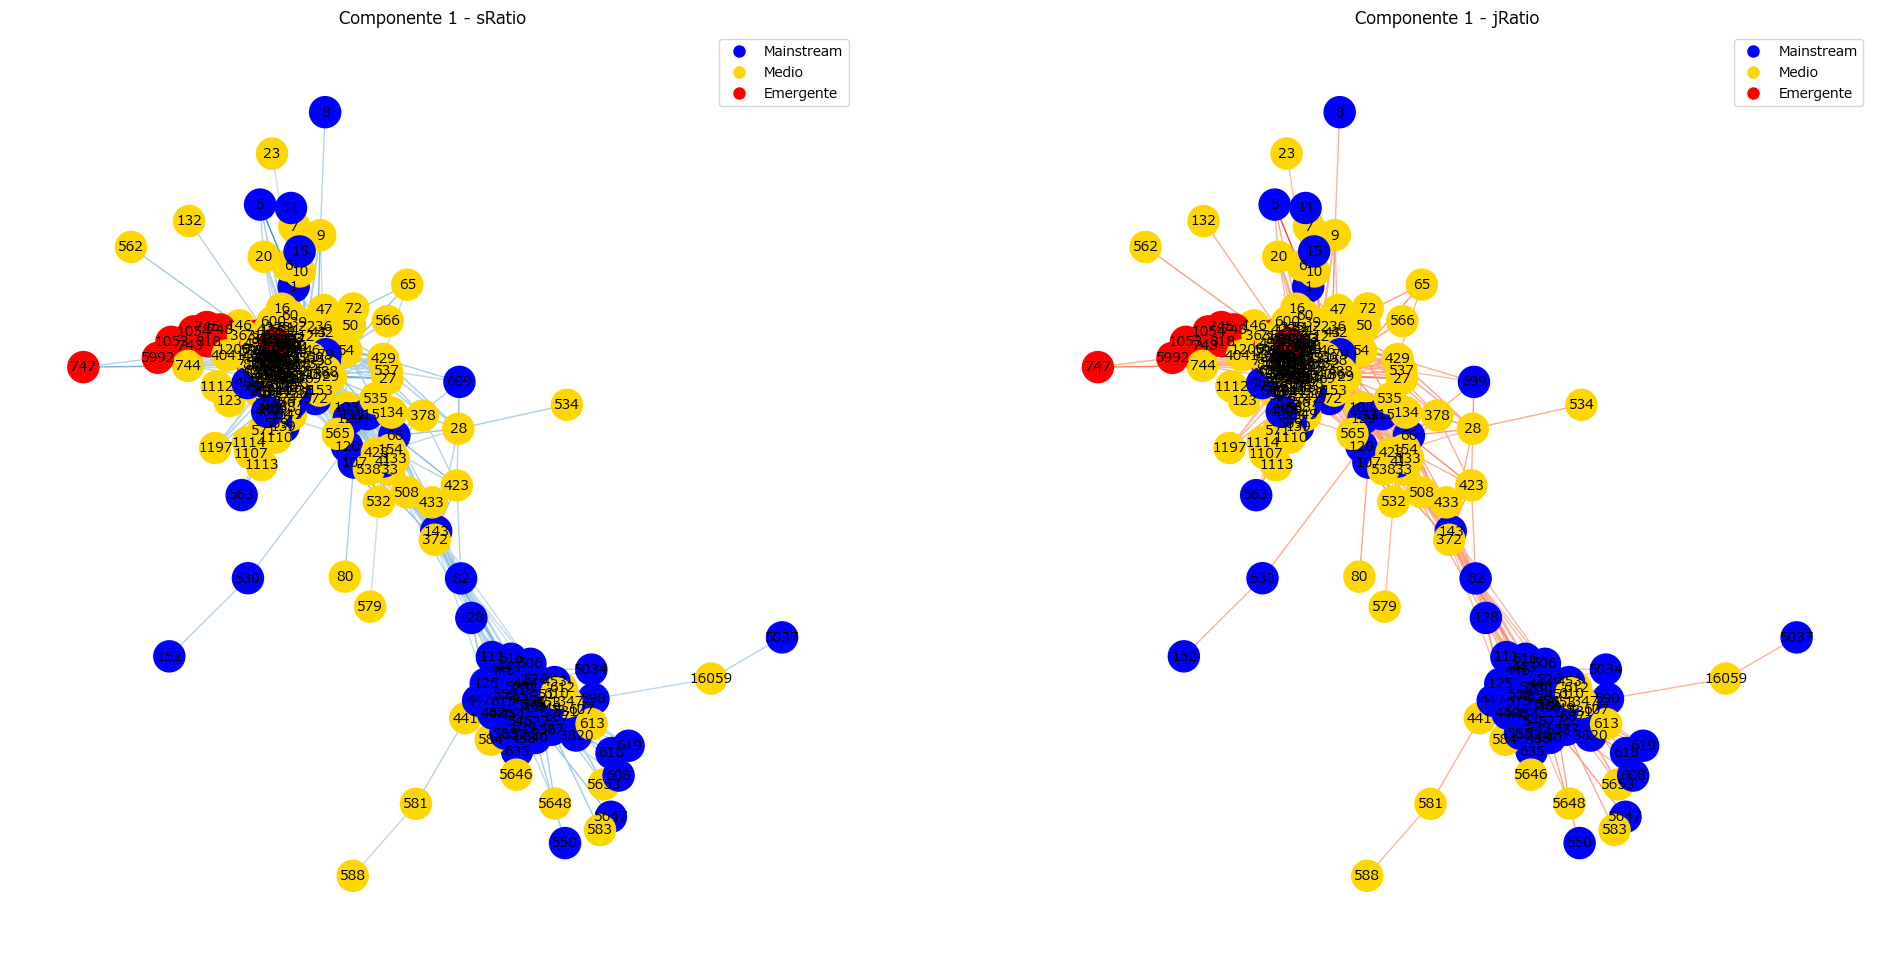

In [9]:
comps = list(nx.connected_components(g))
connComp = len(comps)

subgIndex = 1

chrThreshold = 0.25

zIndexMap = {row['ID']: row['ZIndex'] for _, row in zdf.iterrows()}

def componentGraph(g, id, ratio="sRatio", ax=None, title="Componente"):
    try:
        graph = nx.subgraph(g, comps[id - 1])
        edges = list(graph.edges)
        weights = np.array([graph[u][v][ratio] for u, v in edges])

        minW, maxW = min(weights), max(weights)
        normWgh = (weights - minW) / (maxW - minW) if maxW != minW else np.ones_like(weights)
        normWgh = normWgh * (1 - chrThreshold) + chrThreshold

        cMapEdges = plt.cm.Blues if ratio == 'sRatio' else plt.cm.Reds
        edgeColors = cMapEdges(normWgh)

        colors = []
        for node in graph.nodes:
            z = zIndexMap.get(node, 0)
            if z >= mstreamThold:
                colors.append("blue")      # Mainstream
            elif z <= emrgentThold:
                colors.append("red")      # Emergente
            else:
                colors.append("gold")       # Medio

        pos = nx.spring_layout(graph, seed=42)
        nx.draw(graph, pos, with_labels=True, edge_color=edgeColors, node_color=colors,
                node_size=500, font_size=10, ax=ax)

        ax.set_title(f"{title} - {ratio}", fontsize=12)
        
        bLabel = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Mainstream')
        gLabel = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Medio')
        rLabel = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Emergente')
        
        ax.legend(handles=[bLabel, gLabel, rLabel], loc='upper right')
        
    except Exception as e:
        print(f"Errore nella visualizzazione del componente [{id}]: {str(e)}")

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

componentGraph(g, subgIndex, ratio='sRatio', ax=axes[0], title=f"Componente {subgIndex}")
componentGraph(g, subgIndex, ratio='jRatio', ax=axes[1], title=f"Componente {subgIndex}")

## 3.3. Calcolo delle classi intermedie

Per provare a prevedere gli artisti che possono avere un **cambio di classe** si adotta la **Community Detection**. Troviamo le community tramite **Louvain** e generiamo una tabella ordinata per **popolarità media**.

In [10]:
communities = list(nxC.louvain_communities(g))
cStats = []

for i, comm in enumerate(communities):
    subg = g.subgraph(comm)
    zValues = [zIndexMap.get(n, 0) for n in subg.nodes]
    popAvg = np.round(np.mean(zValues), 5)

    sRatios = [subg[u][v]['sRatio'] for u, v in subg.edges]
    jRatios = [subg[u][v]['jRatio'] for u, v in subg.edges]

    sAvg = np.round(np.mean(sRatios), 5)
    jAvg = np.round(np.mean(jRatios), 5)

    cStats.append({
        'CommunityID': i,
        'nNodi': len(subg.nodes),
        'PopMedia': popAvg,
        'sRatioMedio': sAvg,
        'jRatioMedio': jAvg
    })

cdf = pd.DataFrame(cStats).sort_values(by="PopMedia", ascending=False)
cdf

,CommunityID,nNodi,PopMedia,sRatioMedio,jRatioMedio
312,312,3,4.06136,72.66667,57.00000
775,775,2,3.64222,70.00000,54.00000
262,262,3,2.75439,71.00000,55.50000
817,817,2,2.69719,71.00000,55.00000
383,383,2,2.68950,72.00000,56.00000
...,...,...,...,...,...
202,202,5,-1.81715,68.00000,51.75000
161,161,2,-1.85547,67.00000,50.00000
217,217,2,-1.94904,72.00000,56.00000
535,535,2,-1.95666,75.00000,63.00000


A questo punto si creano **altre tre classi** per identificare i **nodi che possono tendere al cambio di classe**: chi potrebbe **tornare** a diventare **di nicchia**, chi potrebbe essere un **possibile medio** e chi potrebbe essere un **possibile mainstream**.

Si contano i vicini di ogni nodo per classe e, per ciascuno:

- Diventa **possibile mainstream** se è **emergente o medio** e ha **almeno due vicini mainstream**
- Diventa **possibile medio** se è **mainstream**/**emergente** e ha **almeno due vicini emergenti**/**mainstream**.
- Può **tornare emergente** se è **mainstream**/**medio** e ha **almeno tre vicini emergenti**.

In [11]:
cMap = dict(zip(conZdfIDs["ID"], conZdfIDs["Classe"]))

pMainstream = []
pMedio = []
rEmergente = []

for node in g.nodes():
    cl = cMap.get(node)
    if cl is None:
        continue

    neighbors = list(g.neighbors(node))
    neighborClasses = [cMap.get(n) for n in neighbors]

    nMainstream = neighborClasses.count("Mainstream")
    nMedio = neighborClasses.count("Medio")
    nEmergente = neighborClasses.count("Emergente")

    if cl in ["Emergente", "Medio"] and nMainstream >= 2:
        pMainstream.append(node)

    if (cl == "Mainstream" and nEmergente >= 2) or \
       (cl == "Emergente" and nMedio >= 2):
        pMedio.append(node)

    if cl in ["Mainstream", "Medio"] and nEmergente >= 3:
        rEmergente.append(node)

conZdfIDs.loc[conZdfIDs["ID"].isin(rEmergente), "Classe"] = "Ritorno emergente"
conZdfIDs.loc[conZdfIDs["ID"].isin(pMainstream) & ~conZdfIDs["ID"].isin(rEmergente), "Classe"] = "Possibile mainstream"
conZdfIDs.loc[conZdfIDs["ID"].isin(pMedio) & ~conZdfIDs["ID"].isin(rEmergente) & ~conZdfIDs["ID"].isin(pMainstream), "Classe"] = "Possibile medio"

conZdfIDs


,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex,Classe
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102,Mainstream
24662,24663,乃木坂46,19038,6776806,355.94337,5.87757,4.63737,Mainstream
27618,27619,TOMORROW X TOGETHER,987319,334539893,338.83633,5.82846,4.56557,Mainstream
24690,24691,つばきファクトリー,1103,340332,308.27173,5.73422,4.42779,Mainstream
4443,4444,Loredana Errore,5855,1722425,294.12995,5.68741,4.35935,Ritorno emergente
...,...,...,...,...,...,...,...,...
7774,7775,Gabrielkoral,3,3,0.75000,0.55961,-3.13765,Emergente
8410,8411,"Silvana Martino, Massimo Masiello",0,0,0.00000,0.00000,-3.95581,Emergente
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000,-3.95581,Emergente
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000,-3.95581,Emergente


Si visualizza di nuovo il grafo delle componenti con queste tre nuove classi:

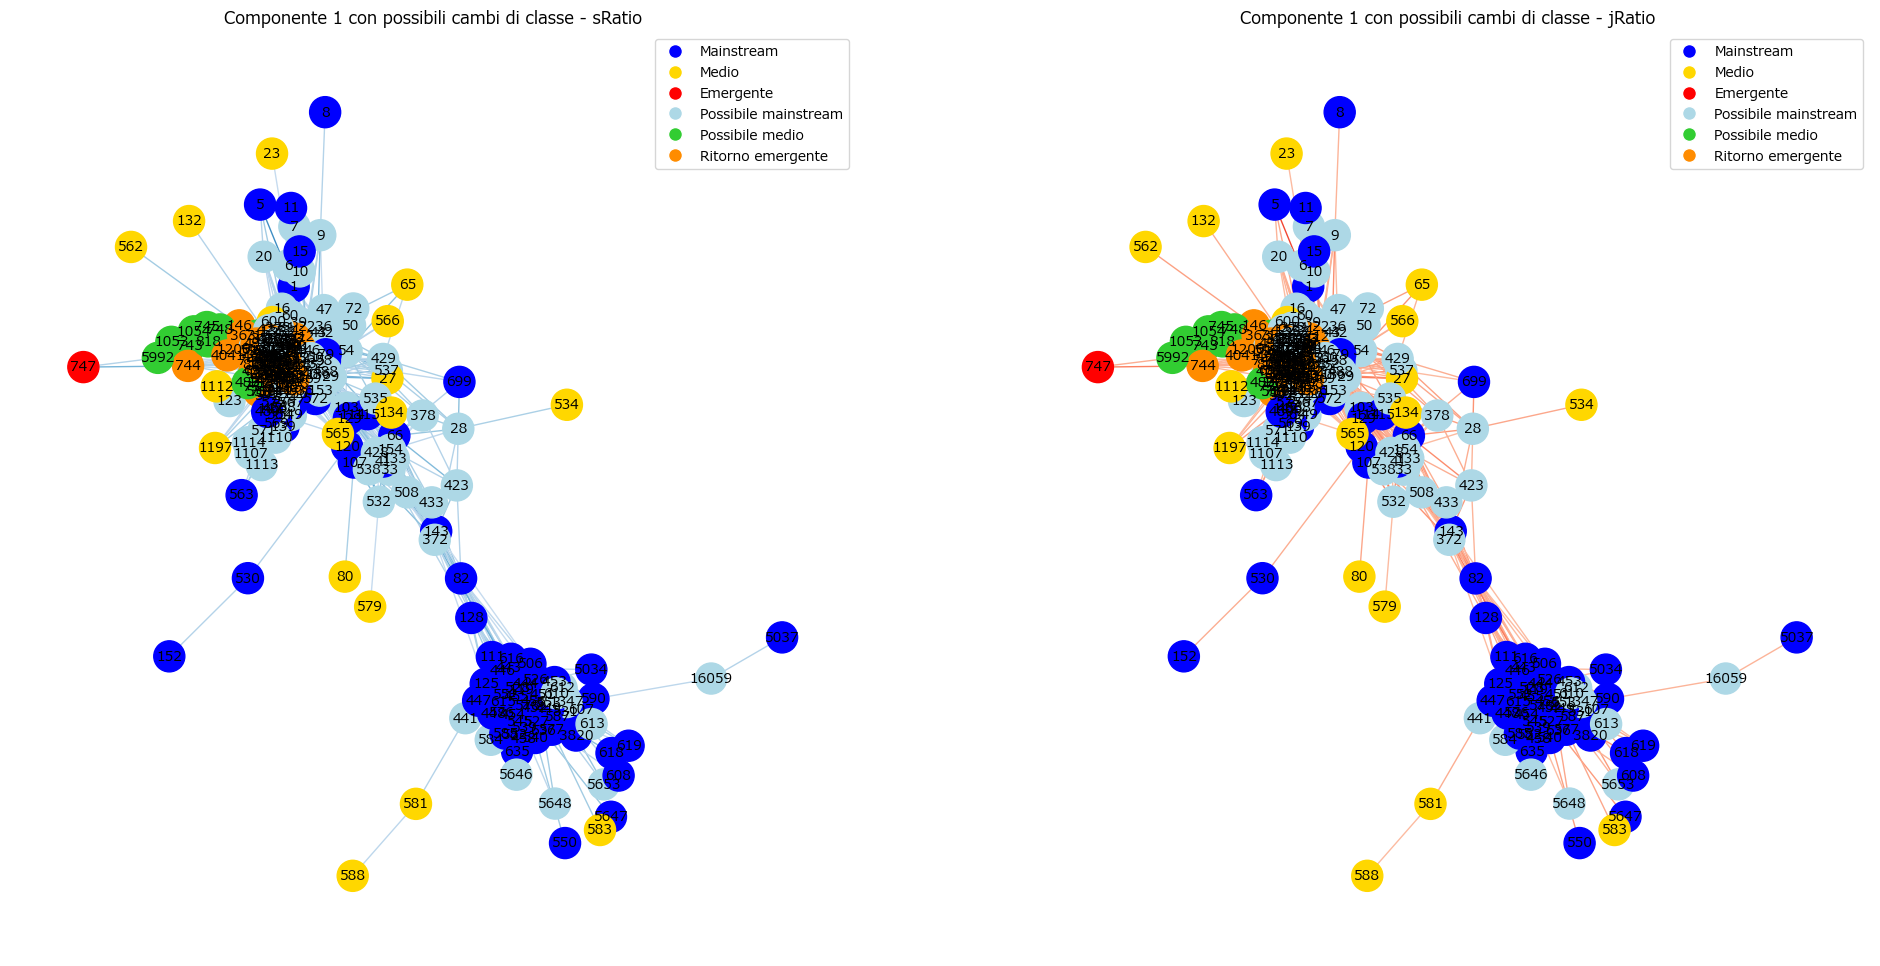

In [12]:
def componentGraph(g, id, ratio="sRatio", ax=None, title="Componente"):
    try:
        graph = nx.subgraph(g, comps[id - 1])
        edges = list(graph.edges)
        weights = np.array([graph[u][v][ratio] for u, v in edges])

        minW, maxW = min(weights), max(weights)
        normWgh = (weights - minW) / (maxW - minW) if maxW != minW else np.ones_like(weights)
        normWgh = normWgh * (1 - chrThreshold) + chrThreshold

        cmapEdges = plt.cm.Blues if ratio == 'sRatio' else plt.cm.Reds
        edgeColors = cmapEdges(normWgh)

        classeMap = dict(zip(conZdfIDs["ID"], conZdfIDs["Classe"]))

        colors = []
        for node in graph.nodes:
            classe = classeMap.get(node, "Medio")

            if classe == "Mainstream":
                colors.append("blue")
            elif classe == "Medio":
                colors.append("gold")
            elif classe == "Emergente":
                colors.append("red")
            elif classe == "Possibile mainstream":
                colors.append("lightblue")
            elif classe == "Possibile medio":
                colors.append("limegreen")
            elif classe == "Ritorno emergente":
                colors.append("darkorange")
            else:
                colors.append("gray")

        pos = nx.spring_layout(graph, seed=42)
        nx.draw(graph, pos, with_labels=True, edge_color=edgeColors, node_color=colors,
                node_size=500, font_size=10, ax=ax)

        ax.set_title(f"{title} - {ratio}", fontsize=12)

        legend = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Mainstream'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Medio'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Emergente'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Possibile mainstream'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='limegreen', markersize=10, label='Possibile medio'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkorange', markersize=10, label='Ritorno emergente')
        ]

        ax.legend(handles=legend, loc='upper right')

    except Exception as e:
        print(f"Errore nella visualizzazione del componente [{id}]: {str(e)}")
        
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

componentGraph(g, subgIndex, ratio='sRatio', ax=axes[0], title=f"Componente {subgIndex} con possibili cambi di classe")
componentGraph(g, subgIndex, ratio='jRatio', ax=axes[1], title=f"Componente {subgIndex} con possibili cambi di classe")

## 3.4. Previsione del trend

Si calcolano i **coefficienti di correlazione** (Degree Centrality, Clustering, Betweenness Centrality e PageRank).

Prendendo in considerazione tali parametri, il **Sample** e lo **Jaccard Ratio medi** si costruisce una **heat map** che visualizza la **distribuzione degli artisti per classe** e per il rispettivo **trend** (ovvero **se la loro popolarità può crescere, decrescere o rimanere stabile**).

Correlazioni tra metriche strutturali e popolarità (ZIndex):
Degree: 0.002
Clustering: -0.038
Betweenness: 0.01
PageRank: 0.043
AvgSampleRatio: 0.005
AvgJaccardRatio: -0.012


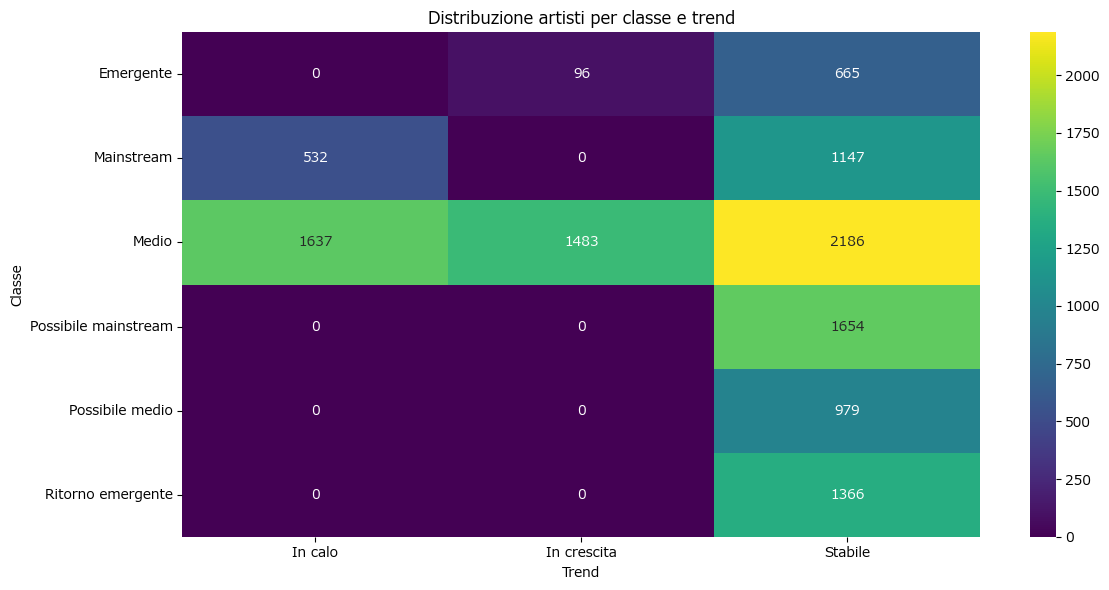

,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex,Classe,Degree,Clustering,Betweenness,PageRank,AvgSampleRatio,AvgJaccardRatio,Trend
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102,Mainstream,1,0.0,0.0,0.000020,81.000000,68.000000,In calo
28082,28083,ジャニーズWEST,1357,310799,228.86524,5.43749,3.99396,Mainstream,1,0.0,0.0,0.000020,67.000000,50.000000,In calo
22779,22780,Juice WRLD,2061457,414235954,200.94319,5.30798,3.80461,Mainstream,1,0.0,0.0,0.000025,76.000000,62.000000,In calo
6028,6029,O.S.T.R.,232513,43380239,186.57043,5.23415,3.69667,Mainstream,1,0.0,0.0,0.000085,70.000000,54.000000,In calo
3498,3499,NewJeans,1382172,248784909,179.99549,5.19847,3.64450,Mainstream,1,0.0,0.0,0.000017,67.000000,51.000000,In calo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,8415,Alberto Berri,12,21,1.61538,0.96140,-2.55022,Emergente,6,1.0,0.0,0.000085,94.833333,95.833333,In crescita
8409,8410,"Isa Landi, Totonno Parise",0,0,0.00000,0.00000,-3.95581,Emergente,6,1.0,0.0,0.000085,95.666667,98.166667,In crescita
8406,8407,"Mario Pasqualillo, Pina Lamara",0,0,0.00000,0.00000,-3.95581,Emergente,6,1.0,0.0,0.000085,95.666667,98.166667,In crescita
8410,8411,"Silvana Martino, Massimo Masiello",0,0,0.00000,0.00000,-3.95581,Emergente,6,1.0,0.0,0.000085,95.666667,98.166667,In crescita


In [13]:
classMap = dict(zip(conZdfIDs["ID"], conZdfIDs["Classe"]))
zMap = dict(zip(conZdfIDs["ID"], conZdfIDs["ZIndex"]))

dDict = dict(g.degree())
cDict = nx.clustering(g)
bDict = nx.betweenness_centrality(g)
prDict = nx.pagerank(g)

conZdfIDs["Degree"] = conZdfIDs["ID"].map(dDict)
conZdfIDs["Clustering"] = conZdfIDs["ID"].map(cDict)
conZdfIDs["Betweenness"] = conZdfIDs["ID"].map(bDict)
conZdfIDs["PageRank"] = conZdfIDs["ID"].map(prDict)

def getRatioValues(arID, df):
    rLinks = df[(df["IDArtista1"] == arID) | (df["IDArtista2"] == arID)]
    sRatios = rLinks["SampleRatio"].values
    jRatios = rLinks["JaccardRatio"].values
    return np.mean(sRatios) if sRatios.size > 0 else 0, np.mean(jRatios) if jRatios.size > 0 else 0

conZdfIDs["AvgSampleRatio"], conZdfIDs["AvgJaccardRatio"] = zip(*conZdfIDs["ID"].map(lambda x: getRatioValues(x, ldf)))

metrics = ["Degree", "Clustering", "Betweenness", "PageRank", "AvgSampleRatio", "AvgJaccardRatio"]
corrs = {m: np.corrcoef(conZdfIDs[m], conZdfIDs["ZIndex"])[0, 1] for m in metrics}

print("Correlazioni tra metriche strutturali e popolarità (ZIndex):")
for m, c in corrs.items():
    print(f"{m}: {round(c, 3)}")

glowUp = conZdfIDs[
    ((conZdfIDs["Classe"].isin(["Emergente", "Medio"])) & 
     ((conZdfIDs["PageRank"] > conZdfIDs["PageRank"].quantile(0.7)) |
      (conZdfIDs["AvgSampleRatio"] > 85) | 
      (conZdfIDs["AvgJaccardRatio"] > 75))) |
    ((conZdfIDs["Classe"] == "Medio") &
     (conZdfIDs["Betweenness"] > conZdfIDs["Betweenness"].quantile(0.75)))
]["ID"].tolist()

glowDown = conZdfIDs[
    ((conZdfIDs["Classe"] == "Mainstream") & 
     (conZdfIDs["Clustering"] < conZdfIDs["Clustering"].quantile(0.3))) |
    ((conZdfIDs["Classe"] == "Medio") &
     (conZdfIDs["Degree"] < conZdfIDs["Degree"].quantile(0.25))) |
    ((conZdfIDs["Classe"] == "Medio") &
     (conZdfIDs["AvgSampleRatio"] < 60) &
     (conZdfIDs["AvgJaccardRatio"] < 55))
]["ID"].tolist()

conZdfIDs["Trend"] = "Stabile"
conZdfIDs.loc[conZdfIDs["ID"].isin(glowUp), "Trend"] = "In crescita"
conZdfIDs.loc[conZdfIDs["ID"].isin(glowDown), "Trend"] = "In calo"

hData = pd.crosstab(conZdfIDs["Classe"], conZdfIDs["Trend"])

plt.figure(figsize=(12, 6))
sns.heatmap(hData, annot=True, cmap="viridis", fmt="d")
plt.title("Distribuzione artisti per classe e trend")
plt.xlabel("Trend")
plt.ylabel("Classe")
plt.tight_layout()
plt.show()

conZdfIDs[conZdfIDs["Trend"] != "Stabile"].sort_values(by="ZIndex", ascending=False)

Si prova a controllare infine quali artisti emergenti possono fare un glow up (quelli promettenti), mostrando le community in cui sono presenti, e i mainstream che possono invece perdere popolarità:

In [26]:
glowUpEmergenti = conZdfIDs[
    (conZdfIDs["Classe"] == "Emergente") & 
    ((conZdfIDs["PageRank"] > conZdfIDs["PageRank"].quantile(0.9)) |
     (conZdfIDs["AvgSampleRatio"] > 90) | 
     (conZdfIDs["AvgJaccardRatio"] > 80))
]

print(f"Numero di artisti emergenti con glow-up: {len(glowUpEmergenti)}")
glowUpEmergenti

Numero di artisti emergenti con glow-up: 19


,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex,Classe,Degree,Clustering,Betweenness,PageRank,AvgSampleRatio,AvgJaccardRatio,Trend
10614,10615,Peter Põder,1557,10214,6.55584,2.02232,-0.99912,Emergente,3,0.000000,7.251117e-08,0.000148,70.333333,54.000000,In crescita
4826,4827,Snap!,809592,5289288,6.53326,2.01932,-1.00350,Emergente,12,0.287879,2.098915e-05,0.000171,70.333333,54.333333,In crescita
8385,8386,Mario Merola,3291,21042,6.39185,2.00037,-1.03121,Emergente,3,0.000000,7.251117e-08,0.000148,68.333333,51.666667,In crescita
21673,21674,Sara Paxton,19230,118001,6.13597,1.96514,-1.08272,Emergente,3,0.000000,4.350670e-08,0.000152,68.666667,52.000000,In crescita
9842,9843,The Rubettes,152705,882026,5.77597,1.91338,-1.15839,Emergente,7,0.285714,3.325637e-05,0.000165,71.285714,55.428571,In crescita
4834,4835,Melodie MC,28421,158651,5.58197,1.88433,-1.20086,Emergente,9,0.444444,8.125385e-06,0.000146,70.666667,54.888889,In crescita
4827,4828,Urban Cookie Collective,130469,670420,5.13849,1.81457,-1.30285,Emergente,12,0.257576,3.099106e-05,0.000190,70.083333,54.250000,In crescita
23056,23057,"Olavo Cavalheiro, Gabi Porto",2411,11279,4.67620,1.73628,-1.41732,Emergente,3,0.000000,4.350670e-08,0.000152,69.333333,53.000000,In crescita
1127,1128,La Banda Dei Bucanieri,1653,7414,4.48246,1.70155,-1.46809,Emergente,5,0.400000,4.350670e-08,0.000150,69.000000,53.200000,In crescita
8396,8397,Mario Da Vinci,103,440,4.23076,1.65455,-1.53681,Emergente,6,1.000000,0.000000e+00,0.000085,94.833333,96.666667,In crescita


C:\Users\calog\AppData\Local\Temp\ipykernel_9664\2151244026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glowUpEmergenti["Community"] = glowUpEmergenti["ID"].map(


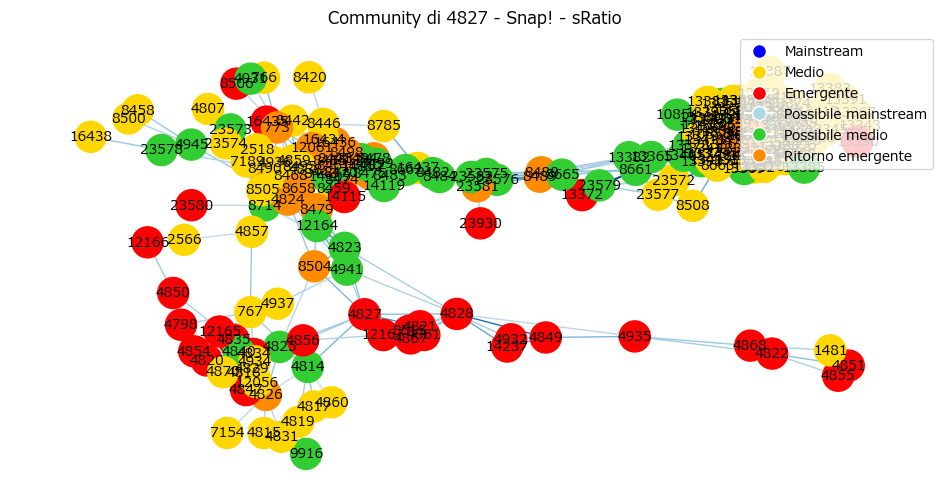

In [28]:
if not glowUpEmergenti.empty:
    glowUpEmergenti["Community"] = glowUpEmergenti["ID"].map(
        lambda x: next((i+1 for i, comp in enumerate(comps) if x in comp), None)
    )

    index = 2
    artistToHighlight = glowUpEmergenti.iloc[index-1]["ID"]
    artistName = glowUpEmergenti.iloc[index-1]["Nome"]
    subgIndex = glowUpEmergenti.iloc[index-1]["Community"]

    fig, ax = plt.subplots(figsize=(12, 6))
    componentGraph(
        g, subgIndex, ratio='sRatio', ax=ax, 
        title=f"Community di {artistToHighlight} - {artistName}"
    )
else:
    print("Nessun artista emergente con possibile glow up")

In [29]:
mainInCalo = conZdfIDs[
    (conZdfIDs["Classe"] == "Mainstream") & 
    (conZdfIDs["Trend"] == "In calo")
]

print(f"Numero di artisti mainstream in calo: {len(mainInCalo)}")

mainInCalo

Numero di artisti mainstream in calo: 532


,ID,Nome,Ascoltatori,Ascolti,Popolarità,PopolaritàLog,ZIndex,Classe,Degree,Clustering,Betweenness,PageRank,AvgSampleRatio,AvgJaccardRatio,Trend
12632,12633,Lyodra,27484,20559599,748.02979,6.61877,5.72102,Mainstream,1,0.000000,0.000000e+00,0.000020,81.000000,68.000000,In calo
28082,28083,ジャニーズWEST,1357,310799,228.86524,5.43749,3.99396,Mainstream,1,0.000000,0.000000e+00,0.000020,67.000000,50.000000,In calo
22779,22780,Juice WRLD,2061457,414235954,200.94319,5.30798,3.80461,Mainstream,1,0.000000,0.000000e+00,0.000025,76.000000,62.000000,In calo
6028,6029,O.S.T.R.,232513,43380239,186.57043,5.23415,3.69667,Mainstream,1,0.000000,0.000000e+00,0.000085,70.000000,54.000000,In calo
3498,3499,NewJeans,1382172,248784909,179.99549,5.19847,3.64450,Mainstream,1,0.000000,0.000000e+00,0.000017,67.000000,51.000000,In calo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2704,Polkadot Stingray,158577,5167458,32.58622,3.51411,1.18192,Mainstream,2,0.000000,1.450223e-08,0.000119,70.500000,54.500000,In calo
19627,19628,Bombay Bicycle Club,1516283,49358623,32.55236,3.51310,1.18044,Mainstream,1,0.000000,0.000000e+00,0.000019,68.000000,52.000000,In calo
4362,4363,Ewa Farna,86406,2810179,32.52258,3.51221,1.17914,Mainstream,1,0.000000,0.000000e+00,0.000046,66.000000,50.000000,In calo
2957,2958,黒崎真音,52292,1700533,32.51932,3.51212,1.17901,Mainstream,85,0.278992,4.314316e-05,0.000355,71.494118,55.811765,In calo


C:\Users\calog\AppData\Local\Temp\ipykernel_9664\2744335002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainInCalo["Community"] = mainInCalo["ID"].map(


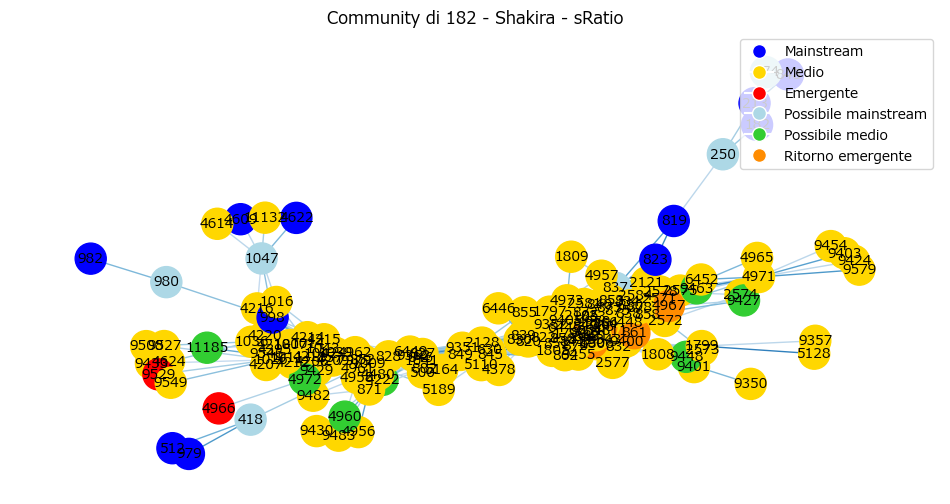

In [35]:
if not mainInCalo.empty:
    mainInCalo["Community"] = mainInCalo["ID"].map(
        lambda x: next((i+1 for i, comp in enumerate(comps) if x in comp), None)
    )

    index = 516
    
    artistToHighlight = mainInCalo.iloc[index-1]["ID"]
    artistName = mainInCalo.iloc[index-1]["Nome"]
    subgIndex = mainInCalo.iloc[index-1]["Community"]

    fig, ax = plt.subplots(figsize=(12, 6))
    componentGraph(
        g, subgIndex, ratio='sRatio', ax=ax, 
        title=f"Community di {artistToHighlight} - {artistName}"
    )
    
else:
    print("Nessun artista mainstream in calo")

⬅️ 2. [Network Analysis](../network_analysis/2_analysis.ipynb)